## This notebook contains the following

### 1. Import data and libraries

### 2. Adress security implications

### 3. Create regional segmentation of data

### 4. Create an exclusion flag to exclude low-activity customers

### 5. Create profiling variables

### 6. Visualization for distribution of profiles

### 7. Aggregation on a customer-profile level for usage frequency and expenditure

### 8. Compare customer profiles with regions and departments

## 1. Import data and libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
copm = pd.read_pickle('/Users/tony/Instacart Basket Analysis/02 Data/Prepared Data/custs_ords_prods_merge.pkl')

In [3]:
# Check dataframe
copm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Security Implications

In [4]:
# List all column names in the DataFrame 'copm'
column_names = copm.columns.tolist()

# Print the list of column names
print(column_names)

['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'Capacity', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_product_price', 'spending_flag', 'median_days_since_prior_order', 'order_frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'marital_status', 'income']


first_name and surname have to be deleted due to PII

In [5]:
# Deleting the 'first_name' and 'surname'
copm = copm.drop(columns=['first_name', 'surname'])

# Display the DataFrame to verify the columns are removed
print(copm.head())

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  spending_flag  median_days_since_prior_order  \
0         Soda  ...    Low spender       

### 3. Create regional segmentation of data

In [6]:
# Create regions 

northeast_region = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ]
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
# Create column based on regions created

copm.loc[copm['state'].isin(northeast_region), 'region'] = 'northeast'
copm.loc[copm['state'].isin(midwest_region), 'region'] = 'midwest'
copm.loc[copm['state'].isin(south_region), 'region'] = 'south'
copm.loc[copm['state'].isin(west_region), 'region'] = 'west'

In [8]:
# Validating the length of new column
len(copm['region'])

32404859

In [9]:
# Checking data
copm['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [10]:
# Create a crosstab to compare spending habits between region and spending_flag

region_spending_crosstab = pd.crosstab(copm['region'], copm['spending_flag'], dropna = False)

In [11]:
# View crosstab
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,155975,7441350
northeast,108225,5614511
south,209691,10582194
west,160354,8132559


### 4. Create an exclusion flag to exclude low-activity customers

In [12]:
# Exclude customers with max_order less than 5 
copm.loc[copm['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [13]:
# Include customers with orders greater than or equal to 5 orders
copm.loc[copm['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [14]:
# Check data

copm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,south,include
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,south,include
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,south,include
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,south,include
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,south,include


In [15]:
# Check frequencies

copm['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30964564
exclude     1440295
Name: count, dtype: int64

In [16]:
# Check exclusion flag with crosstab

exclusion_flag_crosstab = pd.crosstab(copm['exclusion_flag'], copm['max_order'], dropna = False)

In [17]:
exclusion_flag_crosstab

max_order,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
exclusion_flag,,,,,,,,,,,,,,,,,,,,,
exclude,5,6,686741,753543,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
include,0,0,0,0,793140,811396,803979,811843,810213,773124,...,48328,59378,55127,50333,52600,59877,40453,44949,44587,1171333


In [18]:
exclusion_flag_crosstab.to_clipboard()

The exclusion_fag column was verified using excel

In [19]:
# Create sample only with 'include' rows called
copm = copm[copm['exclusion_flag'] == 'include']

In [20]:
# Export sample
copm.to_pickle('/Users/tony/Instacart Basket Analysis/02 Data/Prepared Data/copm_sample.pkl')

### 5. Create profiling variables 

#### Age Groups

In [21]:
# Create age groups 
copm.loc[copm['age'] <= 25, 'age_group'] = 'young adults'
copm.loc[(copm['age'] > 25) & (copm['age'] <= 35), 'age_group'] = 'adults'
copm.loc[(copm['age'] > 35) & (copm['age'] <= 55), 'age_group'] = 'middle aged'
copm.loc[copm['age'] > 55, 'age_group'] = 'seniors'

# View the updated
print(copm[['age', 'age_group']].head())

   age age_group
0   31    adults
1   31    adults
2   31    adults
3   31    adults
4   31    adults


In [22]:
# Check frequency for age group
copm['age_group'].value_counts(dropna = False)

age_group
seniors         12508298
middle aged      9717461
adults           4874287
young adults     3864518
Name: count, dtype: int64

In [23]:
# Aggregate to check usage frequency by age group

copm.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
age_group                                     
adults                    10.273356  0.0  30.0
middle aged               10.222862  0.0  30.0
seniors                   10.223133  0.0  30.0
young adults              10.218019  0.0  30.0

In [24]:
# Aggregate to check expenditure by age group

copm.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
age_group                            
adults        11.985170  1.0  99999.0
middle aged   11.798675  1.0  99999.0
seniors       11.932932  1.0  99999.0
young adults  12.209359  1.0  99999.0

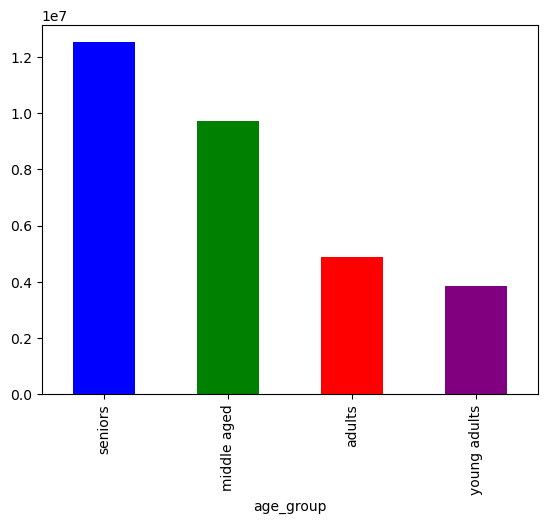

In [25]:
bar = copm['age_group'].value_counts().plot.bar(color=['blue', 'green', 'red', 'purple'])

In [26]:
# Export bar chart for age group

bar.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Barchart Age Group.png')

#### Income

In [27]:
# Create income groups

copm.loc[copm['income'] < 40000, 'income_group'] = 'low'
copm.loc[(copm['income'] >= 40000) & (copm['income'] <= 80000), 'income_group'] = 'middle'
copm.loc[copm['income'] > 80000, 'income_group'] = 'high'

In [28]:
# Check frequency
copm['income_group'].value_counts(dropna = False)

income_group
high      19972644
middle     9379895
low        1612025
Name: count, dtype: int64

In [29]:
# Aggregate to check usage frequency by income group

copm.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
high                      10.200986  0.0  30.0
low                       10.617587  0.0  30.0
middle                    10.226212  0.0  30.0

In [30]:
# Aggregate for expenditure by income group

copm.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
income_group                         
high          14.373375  1.0  99999.0
low            6.502895  1.0     25.0
middle         7.671637  1.0  14900.0

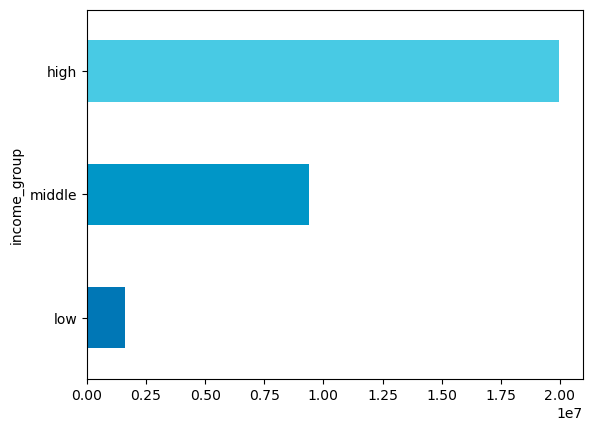

In [31]:
# Income profile visualization

bar_income = copm['income_group'].value_counts().sort_values().plot.barh(color=['#0077b6', '#0096c7', '#48cae4'])

In [32]:
# Export bar chart for income group

bar_income.figure.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Barchart Income Group.png')

#### Number of dependants

In [33]:
# Divide data into customers with and without dependants 

copm.loc[copm['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
copm.loc[copm['n_dependants'] > 0, 'dependants_flag'] = 'has dependants'

In [34]:
# Check frequency

copm['dependants_flag'].value_counts(dropna = False)

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

In [35]:
# Aggregate to check usage frequency by dependants

copm.groupby('dependants_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
has dependants               10.235894  0.0  30.0
no dependants                10.213576  0.0  30.0

In [36]:
# Aggregate for expenditure by dependants

copm.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
has dependants   11.877157  1.0  99999.0
no dependants    12.102657  1.0  99999.0

In [37]:
# Aggregate for expenditure by dependants

copm.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependants_flag                         
has dependants   11.877157  1.0  99999.0
no dependants    12.102657  1.0  99999.0

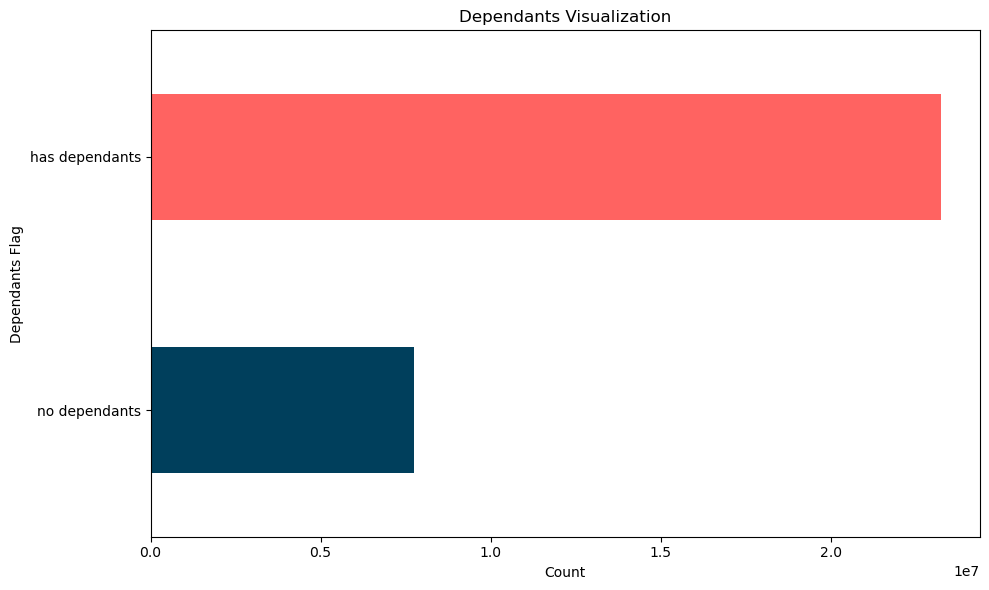

In [38]:
# Adjust the figure size to make sure the chart fits well
plt.figure(figsize=(10, 6))

# Create the horizontal bar chart with adjusted color
bar_dependants = copm['dependants_flag'].value_counts().sort_values().plot.barh(color=['#003f5c', '#ff6361'])

# Set labels and title if needed
plt.xlabel('Count')
plt.ylabel('Dependants Flag')
plt.title('Dependants Visualization')

# Adjust the layout to prevent cutting off
plt.tight_layout()

# Save the figure to the specified path with a higher resolution
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Barchart Depandants.png', dpi=300)

### 6. Visualization for distribution of profiles

In [39]:
# Display all column names in the DataFrame 'copm'
column_names = copm.columns.tolist()

# Print the list of column names
print(column_names)

['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'Capacity', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_product_price', 'spending_flag', 'median_days_since_prior_order', 'order_frequency_flag', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'marital_status', 'income', 'region', 'exclusion_flag', 'age_group', 'income_group', 'dependants_flag']


In [40]:
# Create sample of unique user_id with columns of interest

users = copm[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [41]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
users = users.drop_duplicates()

In [42]:
users

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,1,adults,middle,has dependants,south,New customer
59,15,seniors,middle,no dependants,midwest,Regular customer
131,19,seniors,high,has dependants,south,New customer
335,21,seniors,high,no dependants,west,Regular customer
540,31,middle aged,middle,has dependants,south,Regular customer
...,...,...,...,...,...,...
32404782,178074,middle aged,low,no dependants,south,Regular customer
32404798,11534,seniors,high,no dependants,south,Regular customer
32404810,105857,adults,middle,has dependants,west,New customer
32404819,120516,young adults,middle,no dependants,west,New customer


#### Age Groups

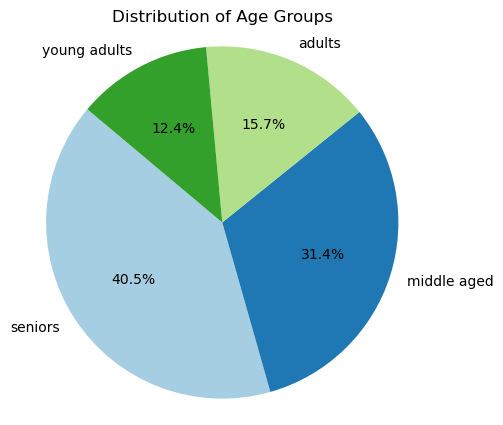

In [43]:
# Count for the age group
age_group_counts = users['age_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
pie_chart = plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_group_counts))))
plt.title('Distribution of Age Groups')  # Add a title to the pie chart
plt.axis('equal')  # Ensure the pie is drawn as a circle

# Save the pie chart to a file
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Pie Chart Age Groups.png')

# Show the plot
plt.show()

#### Income 

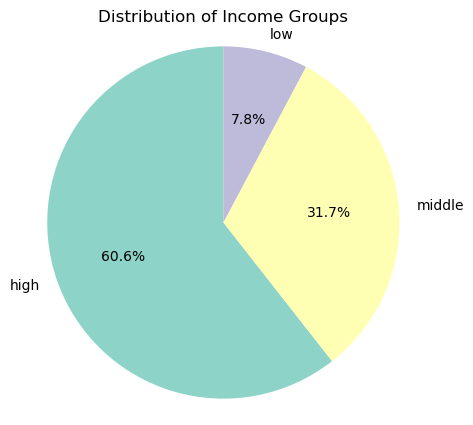

In [44]:
# Create a count for income group
income_group_counts = users['income_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
pie_chart = plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(income_group_counts))))
plt.title('Distribution of Income Groups')  # Add a title to the pie chart
plt.axis('equal')  # Ensure the pie is drawn as a circle

# Save the pie chart to a file
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Pie Chart Income Groups.png')

# Show the plot
plt.show()

#### Dependants 

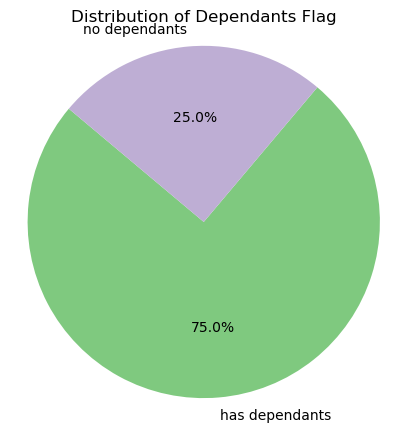

In [45]:
# Create count for dependants
dependants_counts = users['dependants_flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
pie_chart = plt.pie(dependants_counts, labels=dependants_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent(range(len(dependants_counts))))
plt.title('Distribution of Dependants Flag')  # Add a title to the pie chart
plt.axis('equal')  # Ensure the pie is drawn as a circle

# Save the pie chart to a file
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Pie Chart Dependants.png')

# Show the plot
plt.show()

## 7. Aggregation on a customer-profile level for usage frequency and expenditure

In [46]:
# Create subset of data with prices column as the total cost for the order
orders = copm.groupby(['user_id', 'age_group', 'income_group','dependants_flag', 'loyalty_flag',
'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [47]:
# Rename prices to order_total
orders.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [48]:
# Check new subset
orders

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,adults,middle,has dependants,New customer,south,1,0.0,31.6
1,1,adults,middle,has dependants,New customer,south,2,15.0,35.4
2,1,adults,middle,has dependants,New customer,south,3,21.0,28.2
3,1,adults,middle,has dependants,New customer,south,4,29.0,26.0
4,1,adults,middle,has dependants,New customer,south,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,206209,seniors,high,has dependants,Regular customer,midwest,9,22.0,26.2
3064371,206209,seniors,high,has dependants,Regular customer,midwest,10,29.0,64.7
3064372,206209,seniors,high,has dependants,Regular customer,midwest,11,30.0,56.1
3064373,206209,seniors,high,has dependants,Regular customer,midwest,12,18.0,131.5


#### Age Group


In [49]:
# Summary statistics by age group
aggregations_by_age_group = orders.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# View summary
aggregations_by_age_group

days_since_prior_order                 order_total              \
                                min      mean   max         min        mean   
age_group                                                                     
adults                          0.0  9.894431  30.0         1.0  122.361213   
middle aged                     0.0  9.818904  30.0         1.0  118.862443   
seniors                         0.0  9.824920  30.0         1.0  120.252321   
young adults                    0.0  9.830508  30.0         1.0  123.799381   

                        
                   max  
age_group               
adults        100311.3  
middle aged   100442.8  
seniors       100452.9  
young adults  100265.6

#### Income Group

In [50]:
# Summary statistics by income group
aggregations_by_income_group = orders.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# View summary
aggregations_by_income_group

days_since_prior_order                  order_total              \
                                min       mean   max         min        mean   
income_group                                                                   
high                            0.0   9.732862  30.0         1.0  151.718415   
low                             0.0  10.540102  30.0         1.0   49.529783   
middle                          0.0   9.879403  30.0         1.0   74.912499   

                        
                   max  
income_group            
high          100452.9  
low              875.0  
middle         15298.4

#### Dependants

In [51]:
# Summary statistics by dependants
aggregations_by_depandants = orders.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# View summary
aggregations_by_depandants

days_since_prior_order                 order_total  \
                                   min      mean   max         min   
dependants_flag                                                      
has dependants                     0.0  9.836853  30.0         1.0   
no dependants                      0.0  9.827666  30.0         1.0   

                                       
                       mean       max  
dependants_flag                        
has dependants   120.109315  100452.9  
no dependants    122.006145  100384.5

## 8. Compare customer profiles with regions and departments

In [52]:
copm.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag,age_group,income_group,dependants_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,south,include,adults,middle,has dependants


#### Join Department names 

In [53]:
# Load the CSV file
file_path = '/Users/tony/Instacart Basket Analysis/02 Data/Original Data/departments.csv'
departments_df = pd.read_csv(file_path)

# Transpose the dataframe to switch rows and columns
df_dept = departments_df.T

# Reset index and set appropriate column names
df_dept.reset_index(inplace=True)
df_dept.columns = ['department_id', 'department']

# Remove the original header row that became part of the data
df_dept = df_dept.drop(0)

# Display the transformed dataframe
print(df_dept)

   department_id       department
1              1           frozen
2              2            other
3              3           bakery
4              4          produce
5              5          alcohol
6              6    international
7              7        beverages
8              8             pets
9              9  dry goods pasta
10            10             bulk
11            11    personal care
12            12     meat seafood
13            13           pantry
14            14        breakfast
15            15     canned goods
16            16       dairy eggs
17            17        household
18            18           babies
19            19           snacks
20            20             deli
21            21          missing


In [54]:
# Convert the department_id column in df_dept to integer
df_dept['department_id'] = df_dept['department_id'].astype(int)

# Merge df_dept with copm_df on the department_id column, and store the result in a new dataframe named copm
copm = pd.merge(copm, df_dept, on='department_id', how='left')

#### Top 5 Departments

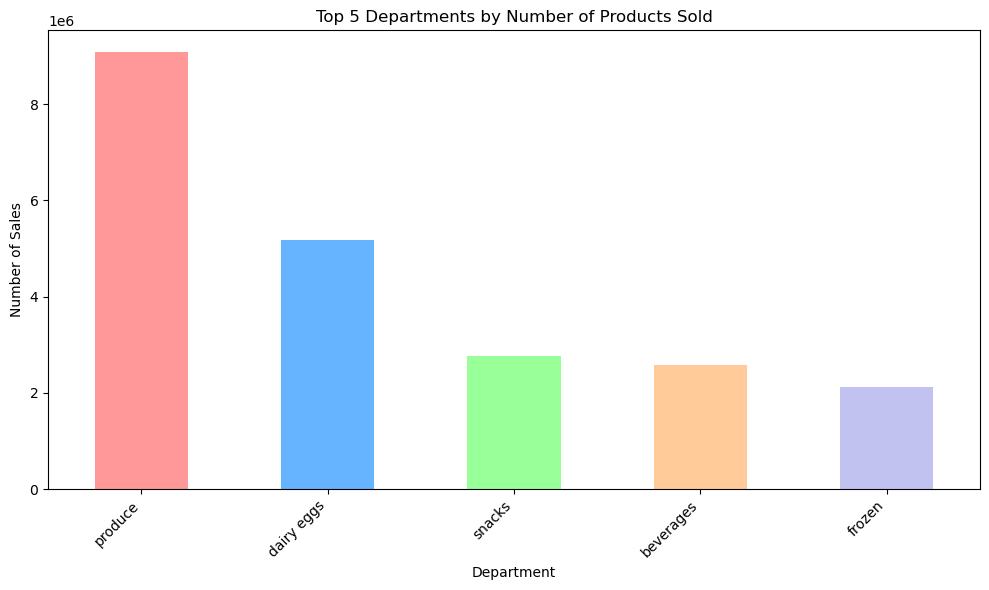

In [55]:
# Calculate the count of each department
department_counts = copm['department'].value_counts()

# Get the top 5 departments based on the number of products sold
top_5_departments = department_counts.head(5)

# Define a list of  colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a bar chart for the top 5 departments
plt.figure(figsize=(10, 6))
top_5_departments.plot(kind='bar', color=colors)
plt.title('Top 5 Departments by Number of Products Sold')
plt.xlabel('Department')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Bar Chart Top 5 Departments.png')

# Show the plot
plt.show()

#### Departments by age Group

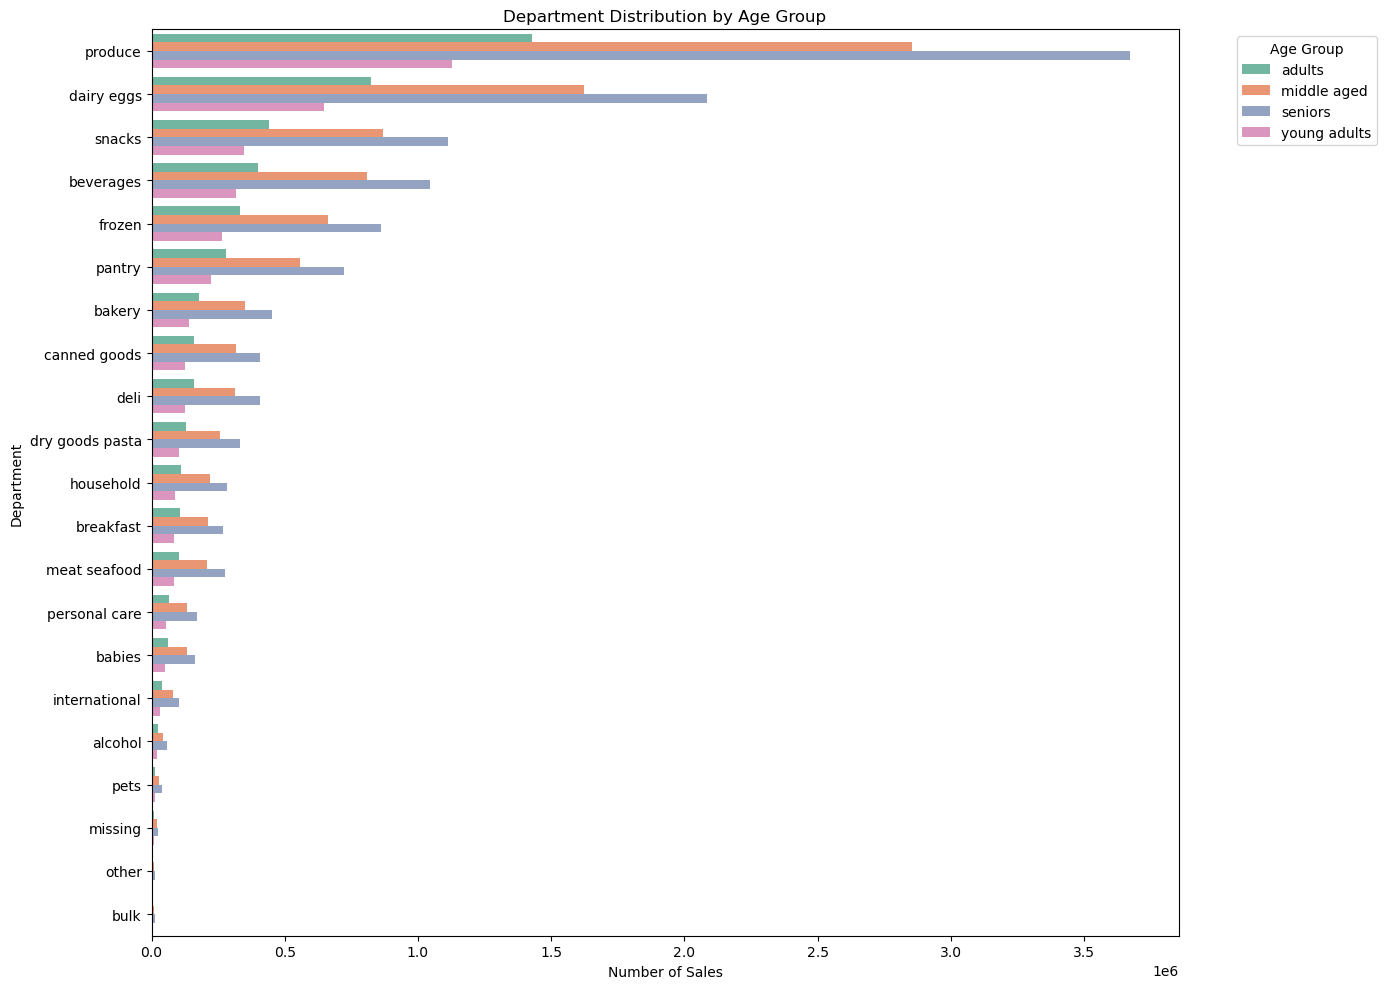

In [56]:
# Group by 'age_group' and 'department', then count the occurrences
age_department_counts = copm.groupby(['age_group', 'department']).size().reset_index(name='count')

# Sort the values within each age group and by count
sorted_age_department_counts = age_department_counts.sort_values(['age_group', 'count'], ascending=[True, False])

# Create a horizontal bar chart for all departments in each age group
plt.figure(figsize=(14, 10))
sns.barplot(x='count', y='department', hue='age_group', data=sorted_age_department_counts, palette='Set2')
plt.title('Department Distribution by Age Group')
plt.xlabel('Number of Sales')
plt.ylabel('Department')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Bar Chart Department Distribution by Age Group.png')

# Show the plot
plt.show()

#### Spending by Loyalty Flag

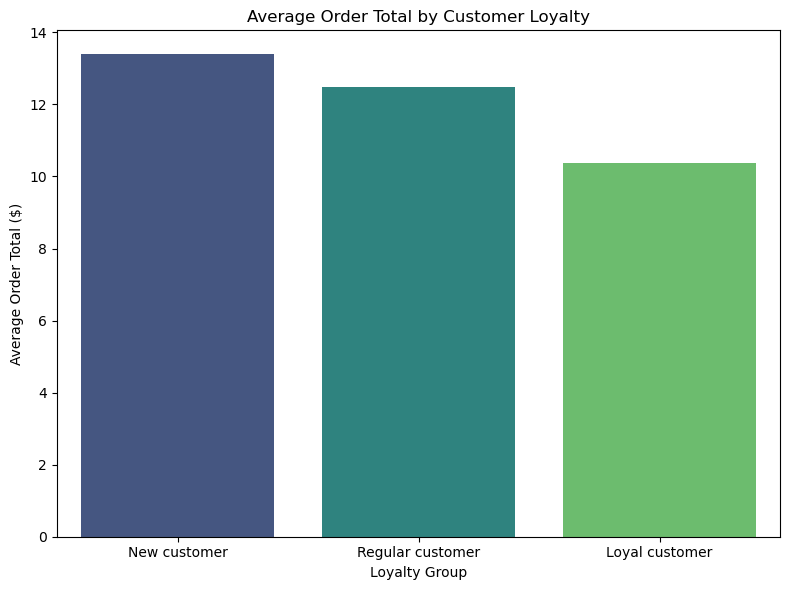

In [57]:
# Calculate the average order total per customer by loyalty group
average_order_total = copm.groupby('loyalty_flag')['prices'].mean().reset_index(name='avg_order_total')

# Sort by average order total in descending order
average_order_total = average_order_total.sort_values(by='avg_order_total', ascending=False)

# Plot average order total by loyalty group
plt.figure(figsize=(8, 6))
sns.barplot(data=average_order_total, x='loyalty_flag', y='avg_order_total', hue='loyalty_flag', dodge=False, palette='viridis')
plt.title('Average Order Total by Customer Loyalty')
plt.xlabel('Loyalty Group')
plt.ylabel('Average Order Total ($)')
plt.legend([], [], frameon=False)  # Suppress the legend
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Average Order Total by Customer Loyalty.png')

# Show the plot
plt.show()

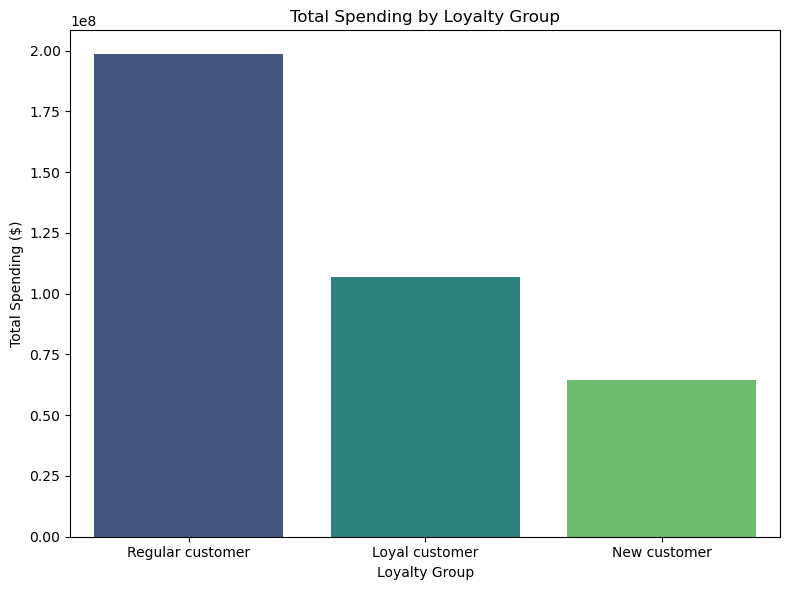

In [58]:
# Calculate the total spending per loyalty group
total_spending = copm.groupby('loyalty_flag')['prices'].sum().reset_index(name='total_spending')

# Sort the total spending data in descending order
total_spending_sorted = total_spending.sort_values(by='total_spending', ascending=False)

# Plot total spending by loyalty group
plt.figure(figsize=(8, 6))
sns.barplot(data=total_spending_sorted, x='loyalty_flag', y='total_spending', hue='loyalty_flag', dodge=False, palette='viridis')
plt.title('Total Spending by Loyalty Group')
plt.xlabel('Loyalty Group')
plt.ylabel('Total Spending ($)')
plt.legend([], [], frameon=False)  # Suppress the legend
plt.tight_layout()

# Save the plot (uncomment the line below to save the plot)
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Bar Chart Total Spending by Loyalty Group.png')

plt.show()


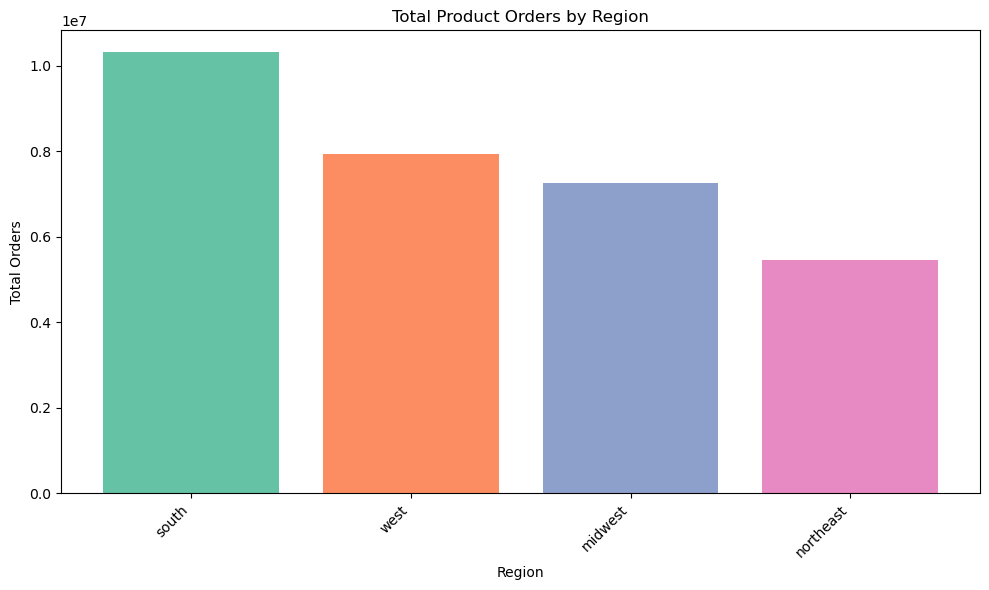

In [59]:
# Aggregate the data to get total orders per region and sort in descending order
region_orders = copm.groupby('region').size().reset_index(name='order_count')
region_orders_sorted = region_orders.sort_values(by='order_count', ascending=False)

# Define a set of harmonizing colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Plotting the sorted bar chart with harmonizing colors
plt.figure(figsize=(10, 6))
plt.bar(region_orders_sorted['region'], region_orders_sorted['order_count'], color=colors[:len(region_orders_sorted)])
plt.title('Total Product Orders by Region')
plt.xlabel('Region')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Bar Chart Total Orders by Region.png')

# Show the plot
plt.show()

#### Heatmap Average Order Total by age group and family status

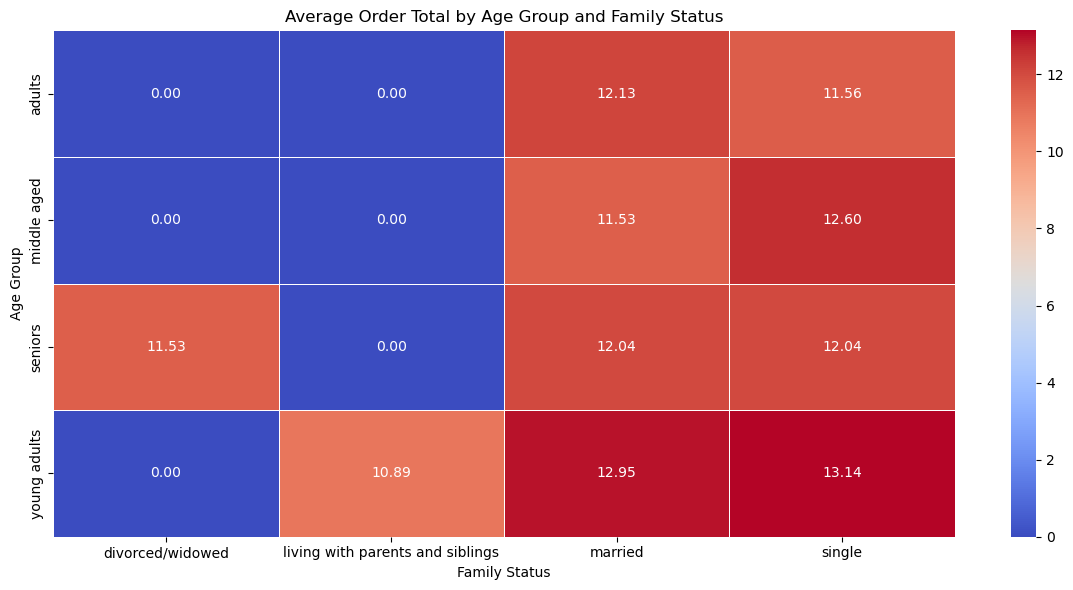

In [60]:
# Calculate the average order total by age group and family status
order_total_heatmap = copm.groupby(['age_group', 'marital_status'])['prices'].mean().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(order_total_heatmap, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Average Order Total by Age Group and Family Status')
plt.xlabel('Family Status')
plt.ylabel('Age Group')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Heatmap Avg Order Total by Age Group and Family Status.png')

# Show the plot
plt.show()

#### Departments by income group

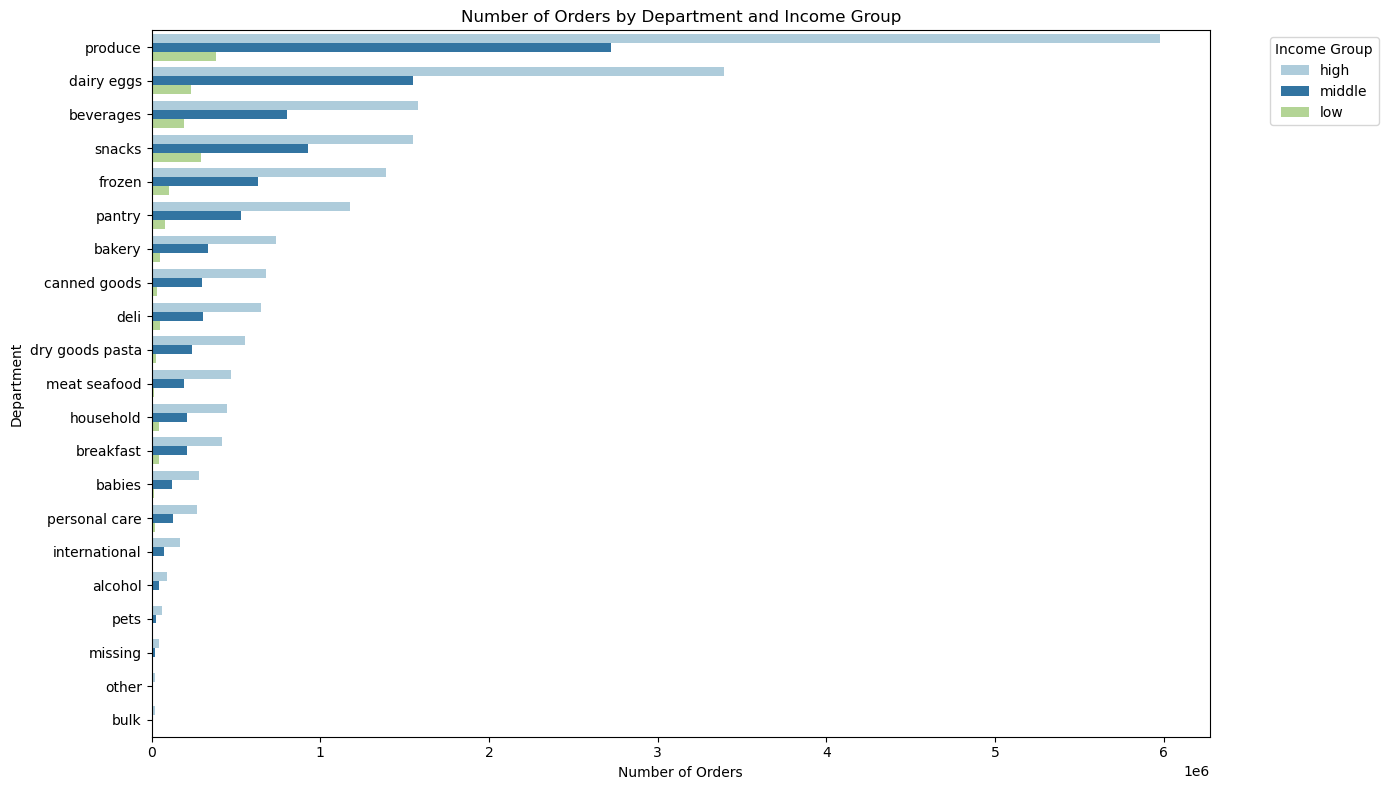

In [61]:
# Calculate the number of orders per department by income group
dept_income_counts = copm.groupby(['income_group', 'department']).size().reset_index(name='order_count')

# Sort the data by order count in descending order
dept_income_counts_sorted = dept_income_counts.sort_values(by='order_count', ascending=False)

# Plotting the sorted horizontal bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=dept_income_counts_sorted, x='order_count', y='department', hue='income_group', dodge=True, palette='Paired')
plt.title('Number of Orders by Department and Income Group')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Horizontal Bar Chart Orders by Department and Income Group.png')

# Show the plot
plt.show()


#### Departments by region

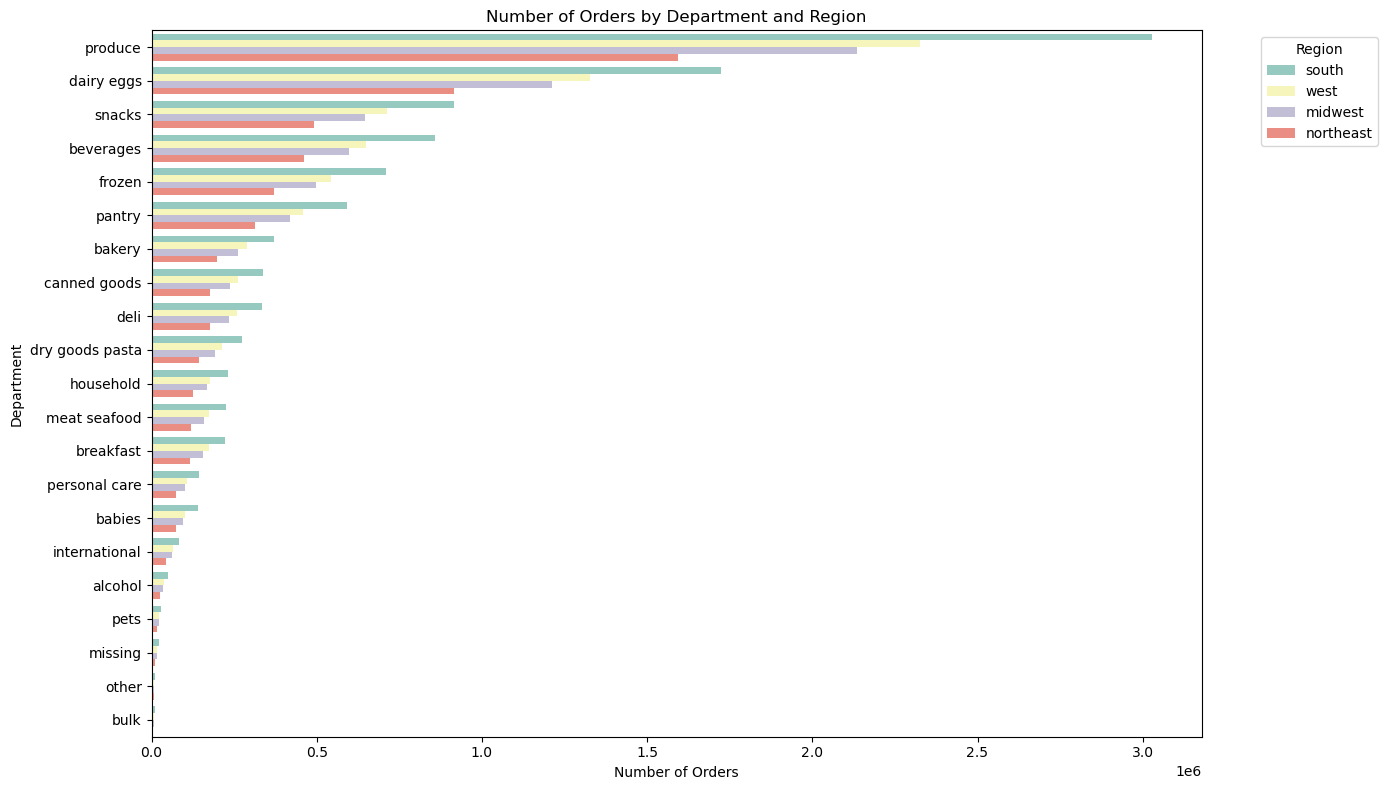

In [62]:
# Calculate the number of orders per department by region
dept_region_counts = copm.groupby(['region', 'department']).size().reset_index(name='order_count')

# Sort the data by order count in descending order
dept_region_counts_sorted = dept_region_counts.sort_values(by='order_count', ascending=False)

# Plotting the sorted horizontal bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=dept_region_counts_sorted, x='order_count', y='department', hue='region', dodge=True, palette='Set3')
plt.title('Number of Orders by Department and Region')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Horizontal Bar Chart Orders by Department and Region.png')

# Show the plot
plt.show()



#### Average Order Frequency by Family status

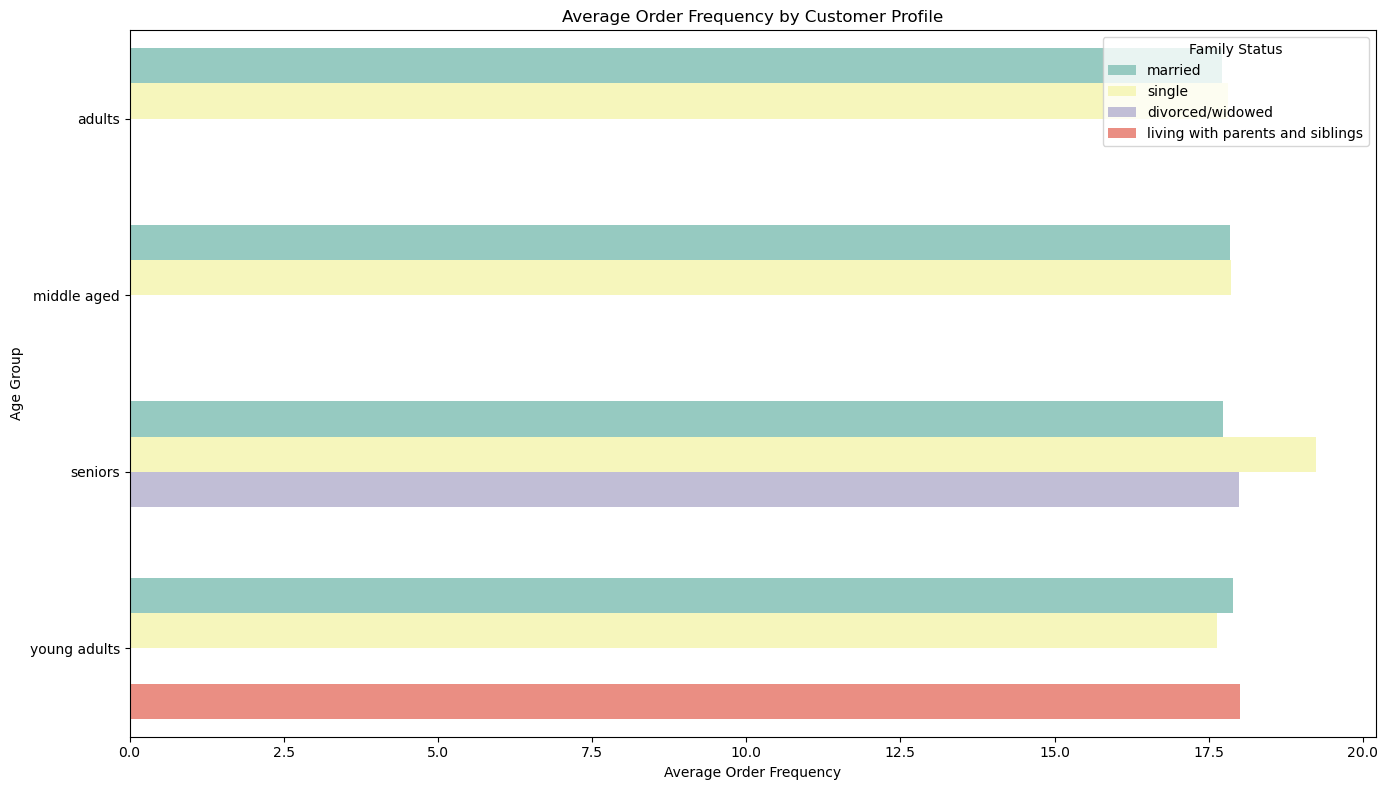

In [63]:
# Calculate the average order frequency by customer profile (age group, marital status, and gender)
avg_order_freq = copm.groupby(['age_group', 'marital_status'])['order_number'].mean().reset_index(name='avg_order_frequency')

# Plotting the average order frequency
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_order_freq, x='avg_order_frequency', y='age_group', hue='marital_status', dodge=True, palette='Set3')
plt.title('Average Order Frequency by Customer Profile')
plt.xlabel('Average Order Frequency')
plt.ylabel('Age Group')
plt.legend(title='Family Status')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Bar ChartAvg Order Frequency by Customer Profile.png')

# Show the plot
plt.show()


#### Order Frequency by age group and income group

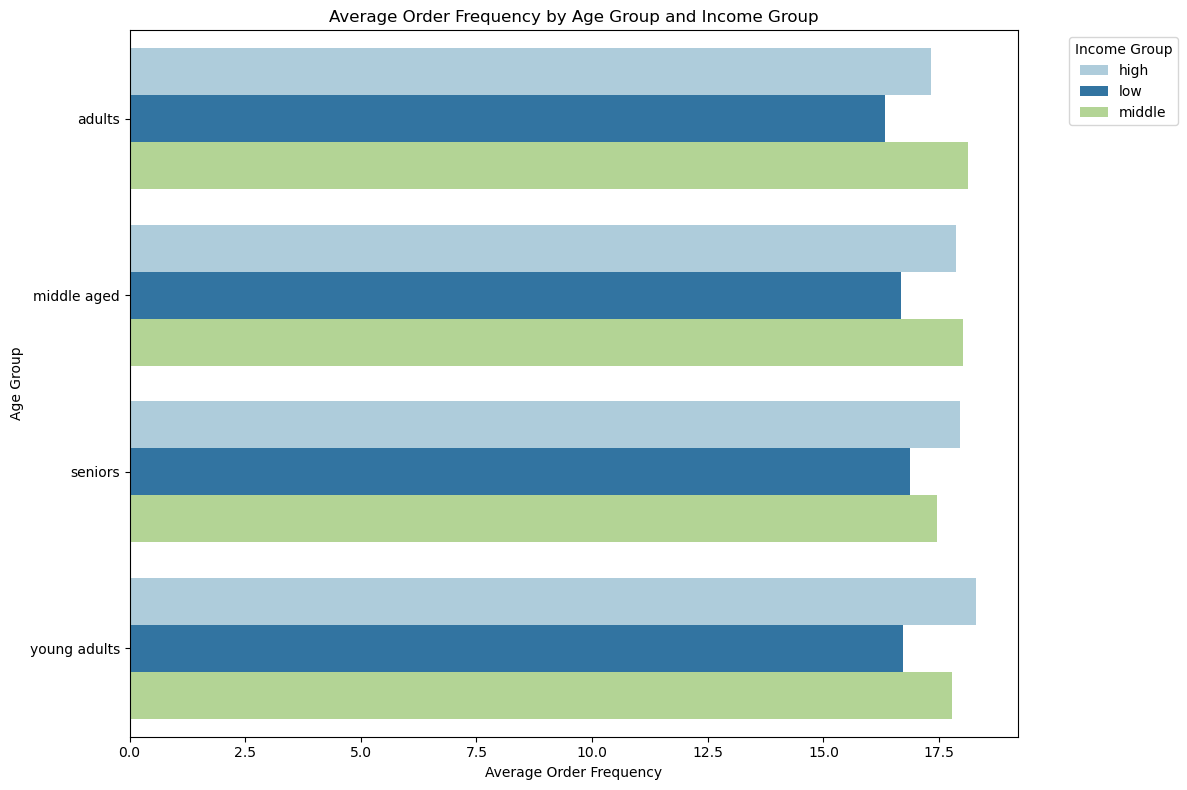

In [68]:
# Calculate the average order frequency by age group and income group
avg_order_freq_age_income = copm.groupby(['age_group', 'income_group'])['order_number'].mean().reset_index(name='avg_order_frequency')

# Check the unique income groups
unique_income_groups = avg_order_freq_age_income['income_group'].unique()
num_income_groups = len(unique_income_groups)

# Define a set of harmonizing colors (adjusted to the number of income groups)
colors = ['#a6cee3', '#1f78b4', '#b2df8a']  # Adjust the number of colors as needed

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_order_freq_age_income, x='avg_order_frequency', y='age_group', hue='income_group', palette=colors[:num_income_groups])
plt.title('Average Order Frequency by Age Group and Income Group')
plt.xlabel('Average Order Frequency')
plt.ylabel('Age Group')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Horizontal Bar Chart Avg Order Frequency by Age and Income Group.png')

# Show the plot
plt.show()


#### Averge order price by age group and income group

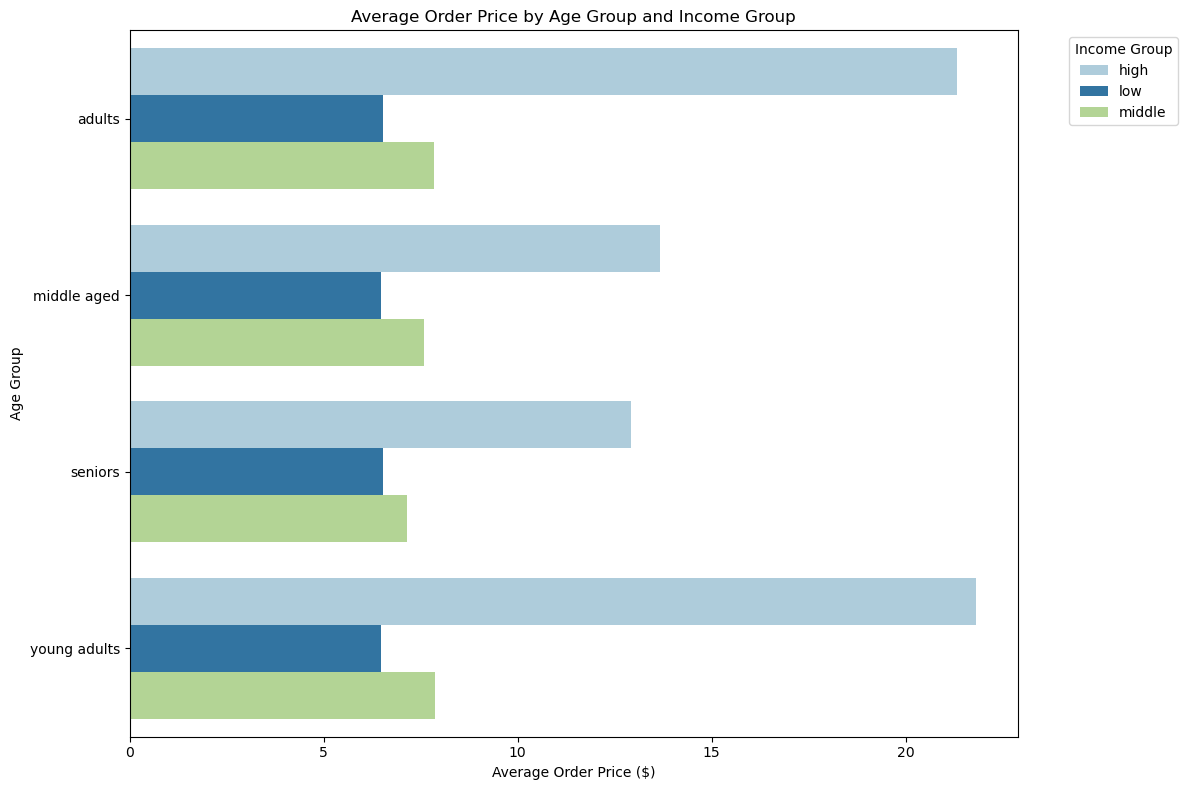

In [66]:
# Calculate the average order price by age group and income group
avg_order_price_age_income = copm.groupby(['age_group', 'income_group'])['prices'].mean().reset_index(name='avg_order_price')

# Check the unique income groups
unique_income_groups = avg_order_price_age_income['income_group'].unique()
num_income_groups = len(unique_income_groups)

# Define a set of harmonizing colors (adjusted to the number of income groups)
colors = ['#a6cee3', '#1f78b4', '#b2df8a']  # Assuming there are three income groups

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_order_price_age_income, x='avg_order_price', y='age_group', hue='income_group', palette=colors[:num_income_groups])
plt.title('Average Order Price by Age Group and Income Group')
plt.xlabel('Average Order Price ($)')
plt.ylabel('Age Group')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Horizontal Bar Chart Avg Order Price by Age and Income Group.png')

# Show the plot
plt.show()


#### Average Order price by marital status

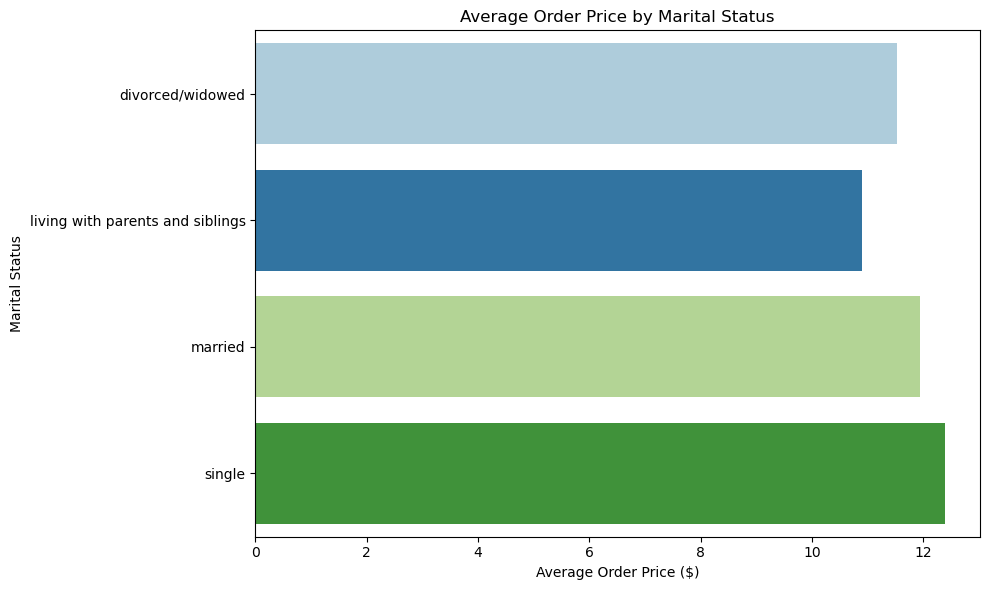

In [65]:
# Calculate the average order price by marital status
avg_order_price_marital_status = copm.groupby('marital_status')['prices'].mean().reset_index(name='avg_order_price')

# Check the unique marital statuses
unique_marital_statuses = avg_order_price_marital_status['marital_status'].unique()
num_marital_statuses = len(unique_marital_statuses)

# Define colors (adjusted to the number of marital statuses)
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']  # Adjust the number of colors as needed

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_order_price_marital_status, x='avg_order_price', y='marital_status', hue='marital_status', dodge=False, palette=colors[:num_marital_statuses])
plt.title('Average Order Price by Marital Status')
plt.xlabel('Average Order Price ($)')
plt.ylabel('Marital Status')
plt.legend([], [], frameon=False)  # Suppress the legend as it's not needed
plt.tight_layout()

# Save the plot
#plt.savefig('/Users/tony/Instacart Basket Analysis/04 Analysis/Visualizations/Horizontal Bar Chart Avg Order Price by Marital Status.png')

# Show the plot
plt.show()


In [ ]:
# Export dataframe

copm.to_pickle('/Users/tony/Instacart Basket Analysis/02 Data/Prepared Data/copm_final.pkl')